In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community

In [8]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

### Questão 1

In [68]:
from networkx.algorithms.community import greedy_modularity_communities

G= nx.read_edgelist("jazz.txt", nodetype=int)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc
    nc = nc+1
    print('Community:', sorted(c[k]))

Community: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community: [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community: [186, 187, 188]


In [69]:
print("Modularity Jazz fastgreedy= ", modularity(G,communities))

Modularity Jazz fastgreedy=  0.4389078153753761


### Questão 2

In [86]:
import community as community_louvain

In [91]:
G= nx.read_edgelist("jazz.txt", nodetype=int)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [92]:
from community import community_louvain
partitions =community_louvain.best_partition(G)

In [93]:
print("Modularity Jazz Louvain = ", modularity(G,partitions))

Modularity Jazz Louvain =  0.44435519867888795


### Questão 3

In [62]:
G= nx.read_edgelist("jazz.txt", nodetype=int)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

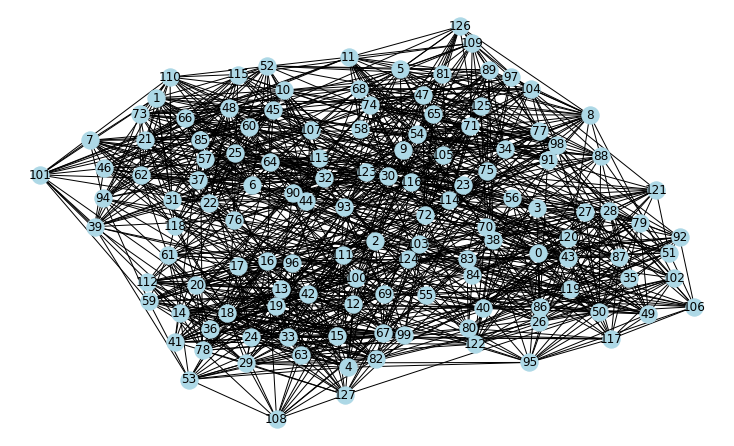

In [63]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.2
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [64]:
partition = community_louvain.best_partition(G)

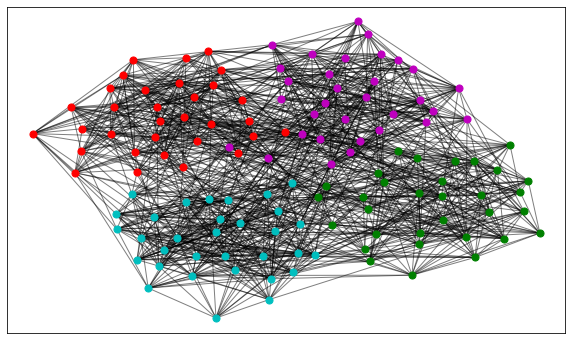

In [65]:
#drawing
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [66]:
c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc
    nc = nc+1
    print('Community:', sorted(c[k]))

Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 123, 124]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 85, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 94, 101, 107, 110, 113, 115, 118]


In [54]:
print("Modularity 0.05 = ", modularity(G,communities))

Modularity 0.05 =  0.643639535397838


In [61]:
print("Modularity 0.1 = ", modularity(G,communities))

Modularity 0.1 =  0.5427818606053953


In [67]:
print("Modularity 0.2 = ", modularity(G,communities))

Modularity 0.2 =  0.4349088598177227


### Questão 4

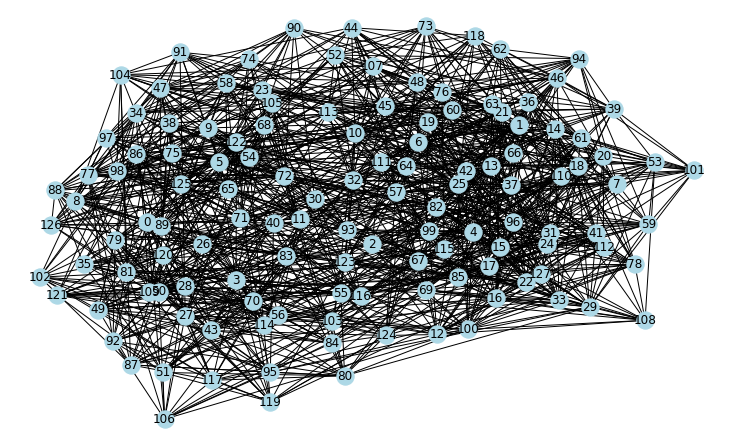

In [83]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.2

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k,
                           max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [84]:
c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc
    nc = nc+1
    print('Community:', sorted(c[k]))

Community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 123, 124]
Community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 85, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 94, 101, 107, 110, 113, 115, 118]


In [79]:
print("Modularity 0.05 = ", modularity(G,communities))

Modularity 0.05 =  0.643639535397838


In [82]:
print("Modularity 0.1 = ", modularity(G,communities))

Modularity 0.1 =  0.5427818606053953


In [85]:
print("Modularity 0.2 = ", modularity(G,communities))

Modularity 0.2 =  0.4349088598177227
